In [112]:
import pandas as pd
import numpy as np
from scipy.stats import weibull_min, invweibull, uniform, norm
from scipy.interpolate import interp1d

import matplotlib.pyplot as plt

# Create the P function from matlab
data = np.loadtxt("powermat.csv", delimiter=",")
x = np.arange(0,30,0.001)
P = interp1d(x,data, fill_value="extrapolate")

# Creating lambda function allowing faster calculations
calculate_power = lambda x: P(x)

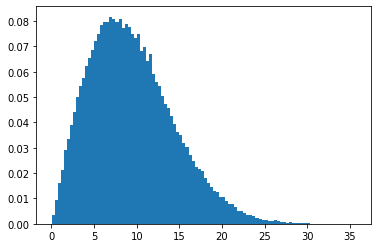

In [113]:
# Setting the parameters, this is for january
k = 2.0
lam = 10.6
n = 10**5

# Creating the wind distribution for a month
wind_distribution =  weibull_min(k,loc=0, scale=lam)

# Generate som wind
wind = wind_distribution.rvs(size=n)
_ = plt.hist(wind, bins=100, density=True)

Mean: 1737033.5808852892 ± 7583.545068128069, Var: 1497036542074.3845


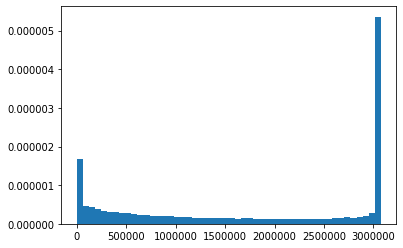

In [114]:
# A) Expected amount of power

# Calculated som power from the generated wind
power = calculate_power(wind)
hist = plt.hist(power, density=True, bins=50)

# Calculating mean, variance and the confidence interval for the mean
mean = np.mean(power)
var = np.var(power)
confidence_intervall = 1.96*np.sqrt(var/n)

print(f'Mean: {mean} ± {confidence_intervall}, Var: {var}')

Mean: 1736642.8302383167 ± 6601.00252481842, Var: 1134247041145.8547


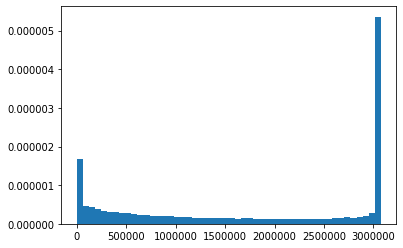

In [115]:
# A) Expected amount of power, truncated version

# Calculating F(3) and F(25) for the distribution for the wind
F_min = wind_distribution.cdf(3)
F_max = wind_distribution.cdf(25)

# Generate som uniform data, scaled to to F(3) and F(25):
u = uniform.rvs(loc = wind_distribution.cdf(3), scale = (F_max - F_min), size=n)

# Run u through inverse of weibull 
wind_truncated = wind_distribution.ppf(u)

# Calculated the power for the truncated wind
power_trunc = calculate_power(wind_truncated)
hist = plt.hist(power, density=True, bins=50)

# Calculating mean, variance and the confidence interval for the mean
mean = np.mean(power_trunc)*(F_max-F_min)
var = np.var(power_trunc)*((F_max-F_min)**2)
confidence_intervall = 1.96*np.sqrt(var/n)

print(f'Mean: {mean} ± {confidence_intervall}, Var: {var}')

Mean: 1737342.4571294412 ± 9632.987026502678, Var: 2415515385588.5283


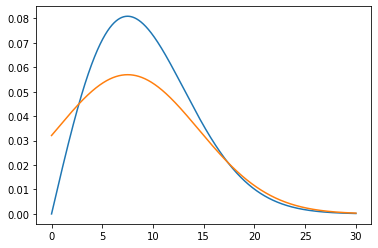

In [116]:
x = np.linspace(0,30, num=n)

# Selecting g as a normal distribution with my = 7.5 and sigma = 5
g_dist = norm(7.5, 7)

# Function to calculate for each drawn g
s = lambda x: P(x)*wind_distribution.pdf(x)/g_dist.pdf(x)

plt.plot(x,wind_distribution.pdf(x))
plt.plot(x, g_dist.pdf(x))
#plt.plot(x, s(x))

# Draw n samples from g
samples_from_g = g_dist.rvs(size=n)

# Calculated the weighted sample
weighted_samples = s(samples_from_g)

# Calculating mean, variance and the confidence interval for the mean
mean = np.mean(weighted_samples)
var = np.var(weighted_samples)
confidence_intervall = 1.96*np.sqrt(var/n)

print(f'Mean: {mean} ± {confidence_intervall}, Var: {var}')

1743413.085296709
1741678.1388730335
1961978831366.8782
1962690317669.6326
1742545.6120848712
Mean: 1750797.375 ± 5036.2787949107305, Var: 660248440755.6094


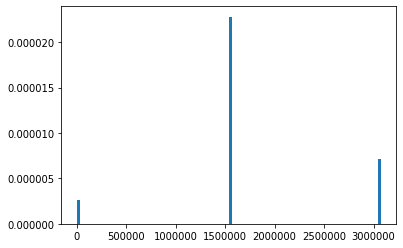

In [124]:
# Letting V = P, and V' = Max(P) - P, unsure if this has increased complexity
V_1 = P
V_2 = lambda x: np.where((x >= 3) & (x <= 13), -P(x) + np.max(P(x)), P(x))
W = lambda x: (V_1(x) + V_2(x))/2

#plt.plot(x, V_1(x))
#plt.plot(x, V_2(x))
#plt.plot(x, W(x))

print(np.mean(V_1(x)))
print(np.mean(V_2(x)))
print(np.var(V_1(x)))
print(np.var(V_2(x)))
print(np.mean(W(x)))

power_as = W(wind)
hist = plt.hist(power_as, density=True, bins=100)

# Calculating mean, variance and the confidence interval for the mean
mean = np.mean(power_as)
var = np.var(power_as)
confidence_intervall = 1.96*np.sqrt(var/n)

print(f'Mean: {mean} ± {confidence_intervall}, Var: {var}')

In [128]:
# Probability that the turbine delivers power
print(f'Prob for delivering power: {(F_max - F_min)*100}%')

Prob for delivering power: 91.91850832071029%
